In [1]:
import time
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from processing import *

folder_movement_path = r'../input/movement-by-day/'
x = os.listdir(folder_movement_path)
x.sort()

dims = 0
for file_name in x:
    df = pd.read_csv(os.path.join(folder_movement_path, file_name))
    print('csv file_name = %s\t|====|\t dimension = %s'%(file_name, df.shape))
    dims += df.shape[0]
print('Total observations: %s'%dims)

csv file_name = movement500meter25.csv	|====|	 dimension = (19722, 9)
csv file_name = movement500meter26.csv	|====|	 dimension = (13662, 9)
csv file_name = movement500meter28.csv	|====|	 dimension = (13089, 9)
csv file_name = movement500meter29.csv	|====|	 dimension = (15120, 9)
csv file_name = movement500meter30.csv	|====|	 dimension = (16135, 9)
csv file_name = movement500meters24.csv	|====|	 dimension = (12792, 9)
Total observations: 90520


#### Loading & viewing.

In [2]:
df = pd.read_csv(os.path.join(folder_movement_path, x[-1]))
for file_name in x[:-1] :
    df_x = pd.read_csv(os.path.join(folder_movement_path, file_name))
    df = df.append(df_x)
print(df.shape)
df.head()

(90520, 9)


,ad_id,latitude,longitude,horizontal_accuracy,id_type,utc_timestamp,geo_hash,ip_address,distance
0,19ab4962-a9d7-4d6d-bdf6-b4b423ee82e2,32.814639,-96.770604,35.0,aaid,1598311520,9vg4tvtz1,NaN,0.45
1,fa0b5052-e0fa-4721-82d8-8feec9eb386e,32.812437,-96.772706,3.0,aaid,1598277619,9vg4tvk62,104.189.112.92,0.28
2,fa0b5052-e0fa-4721-82d8-8feec9eb386e,32.812448,-96.772705,3.0,aaid,1598277629,9vg4tvk62,104.189.112.92,0.28
3,19ab4962-a9d7-4d6d-bdf6-b4b423ee82e2,32.814639,-96.770604,35.0,aaid,1598311520,9vg4tvtz1,NaN,0.45
4,fa0b5052-e0fa-4721-82d8-8feec9eb386e,32.812437,-96.772706,3.0,aaid,1598277619,9vg4tvk62,104.189.112.92,0.28


#### Convert `timestamp` to `utc_datetime`

In [3]:
df['utc_datetime'] = df['utc_timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))
df.head()

,ad_id,latitude,longitude,horizontal_accuracy,id_type,utc_timestamp,geo_hash,ip_address,distance,utc_datetime
0,19ab4962-a9d7-4d6d-bdf6-b4b423ee82e2,32.814639,-96.770604,35.0,aaid,1598311520,9vg4tvtz1,NaN,0.45,2020-08-24 23:25:20
1,fa0b5052-e0fa-4721-82d8-8feec9eb386e,32.812437,-96.772706,3.0,aaid,1598277619,9vg4tvk62,104.189.112.92,0.28,2020-08-24 14:00:19
2,fa0b5052-e0fa-4721-82d8-8feec9eb386e,32.812448,-96.772705,3.0,aaid,1598277629,9vg4tvk62,104.189.112.92,0.28,2020-08-24 14:00:29
3,19ab4962-a9d7-4d6d-bdf6-b4b423ee82e2,32.814639,-96.770604,35.0,aaid,1598311520,9vg4tvtz1,NaN,0.45,2020-08-24 23:25:20
4,fa0b5052-e0fa-4721-82d8-8feec9eb386e,32.812437,-96.772706,3.0,aaid,1598277619,9vg4tvk62,104.189.112.92,0.28,2020-08-24 14:00:19


#### Define the type of `IP_address`

In [4]:
df['ip_address'] = df['ip_address'].fillna('0')
df['is_ip_valid'] = df['ip_address'].apply(lambda x: ip_type(x))
df.head()

,ad_id,latitude,longitude,horizontal_accuracy,id_type,utc_timestamp,geo_hash,ip_address,distance,utc_datetime,is_ip_valid
0,19ab4962-a9d7-4d6d-bdf6-b4b423ee82e2,32.814639,-96.770604,35.0,aaid,1598311520,9vg4tvtz1,0,0.45,2020-08-24 23:25:20,unknown_ip
1,fa0b5052-e0fa-4721-82d8-8feec9eb386e,32.812437,-96.772706,3.0,aaid,1598277619,9vg4tvk62,104.189.112.92,0.28,2020-08-24 14:00:19,IPv4
2,fa0b5052-e0fa-4721-82d8-8feec9eb386e,32.812448,-96.772705,3.0,aaid,1598277629,9vg4tvk62,104.189.112.92,0.28,2020-08-24 14:00:29,IPv4
3,19ab4962-a9d7-4d6d-bdf6-b4b423ee82e2,32.814639,-96.770604,35.0,aaid,1598311520,9vg4tvtz1,0,0.45,2020-08-24 23:25:20,unknown_ip
4,fa0b5052-e0fa-4721-82d8-8feec9eb386e,32.812437,-96.772706,3.0,aaid,1598277619,9vg4tvk62,104.189.112.92,0.28,2020-08-24 14:00:19,IPv4


#### Checking the duplicated-values

In [5]:
print('Data-dimension; before drop_duplicates:', df.shape)
df.drop_duplicates(inplace = True)
print('Data-dimension; after drop_duplicates:', df.shape)

Data-dimension; before drop_duplicates: (90520, 11)
Data-dimension; after drop_duplicates: (90310, 11)


#### Stored the list of unique `ad_id`

In [6]:
unique_ad_id = list(df['ad_id'].value_counts().index)
len(unique_ad_id)

4174

#### Create the subdataframe with respect to the `ad_id`, that:
- Contained these columns `"ad_id", "horz_acc_km", "latitude", "longitude", "utc_datetime"` from the original dataset.
- The inferenced information, such as :

$\qquad \diamond$ `"distance"`, distance of the customer to the restaurant at a certain datetime.

$\qquad \diamond$ `"Texas_time"`, convert the utc-datetime to the Texas-local-timezone.

$\qquad \diamond$ `"Texas_hour"`, focus on the hours to determine the `latitude, longitude` that the customer come home and go away.

$\qquad \diamond$ `"diff_time_sec"`, the different of the 2 consecutive-`datetime`

$\qquad \diamond$ `"diff_dist_km"`,	the different of the 2 consecutive-`distance` in `kilometer`

$\qquad \diamond$ `"speed_meter_per_sec"`, the speed, that the ratio of `diff_dist` and `diff_time` converted in `meter per second`

$\qquad \diamond$ `"day"`: the `day` in the `utc_datetime`.

In [7]:
ad_id = '539f95a6-ce6e-4359-bab5-9f5c866936a2'
sub_df = create_sample_df(df, ad_id)

sub_df.head()

,ad_id,horz_acc_km,latitude,longitude,utc_datetime,Han_dist,distance,Texas_time,Texas_hour,diff_time_sec,diff_dist_km,speed_meter_per_sec,day
10176,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.013,32.811830,-96.767914,2020-08-24 02:17:13,0.3,0.281286,20h17m13s,20,103,0.004271,0.041469,24
10177,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.022,32.811806,-96.767876,2020-08-24 02:18:56,0.3,0.282928,20h18m56s,20,17897,0.004273,0.000239,24
10178,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.013,32.811829,-96.767915,2020-08-24 07:17:13,0.3,0.281156,1h17m13s,1,1,0.000000,0.000000,24
10179,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.010,32.811829,-96.767915,2020-08-24 07:17:14,0.3,0.281156,1h17m14s,1,1,0.000000,0.000000,24
10180,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.007,32.811829,-96.767915,2020-08-24 07:17:15,0.3,0.281156,1h17m15s,1,5,0.001472,0.294376,24


**Observe the time that the speed is greater than 3 m/s.**

In [8]:
sub_df[sub_df['speed_meter_per_sec'] > 3].head(20)

,ad_id,horz_acc_km,latitude,longitude,utc_datetime,Han_dist,distance,Texas_time,Texas_hour,diff_time_sec,diff_dist_km,speed_meter_per_sec,day
10276,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0112,32.811737,-96.767750,2020-08-24 12:39:58,0.30,0.289272,6h39m58s,6,2,0.006295,3.147590,24
10298,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0180,32.811800,-96.767780,2020-08-24 13:35:00,0.30,0.290067,7h35m0s,7,7,0.068171,9.738756,24
10299,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0080,32.812065,-96.768480,2020-08-24 13:35:07,0.26,0.254983,7h35m7s,7,16,0.063830,3.989354,24
10311,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0260,32.811874,-96.767860,2020-08-24 14:09:51,0.30,0.287817,8h9m51s,8,8,0.157816,19.727052,24
10312,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0115,32.812195,-96.769610,2020-08-24 14:09:59,0.21,0.202274,8h9m59s,8,77,0.296238,3.847245,24
10313,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0145,32.814270,-96.767490,2020-08-24 14:11:16,0.51,0.496516,8h11m16s,8,40,0.263345,6.583624,24
10319,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0112,32.811860,-96.767880,2020-08-24 14:17:16,0.30,0.285522,8h17m16s,8,55,0.203853,3.706417,24
10323,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0142,32.811707,-96.767790,2020-08-24 14:24:58,0.30,0.284656,8h24m58s,8,3,0.026726,8.908638,24
10404,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0040,32.811869,-96.767814,2020-08-24 14:37:05,0.31,0.291068,8h37m5s,8,9,0.117206,13.022924,24
10405,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0115,32.812225,-96.769070,2020-08-24 14:37:14,0.24,0.231346,8h37m14s,8,25,0.117206,4.688253,24


#### Extract the day that the customer appear in the dataset.

In [9]:
new_df = sub_df.set_index('utc_datetime')
day_list = list(new_df.day.value_counts().index)
day_list.sort()
day_list

[24, 25, 26, 30]

#### For day = 24

In [10]:
new_df_day = new_df[new_df['day'] == 24]
new_df_day.head(3)

,ad_id,horz_acc_km,latitude,longitude,Han_dist,distance,Texas_time,Texas_hour,diff_time_sec,diff_dist_km,speed_meter_per_sec,day
utc_datetime,,,,,,,,,,,,
2020-08-24 02:17:13,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.013,32.811830,-96.767914,0.3,0.281286,20h17m13s,20,103,0.004271,0.041469,24
2020-08-24 02:18:56,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.022,32.811806,-96.767876,0.3,0.282928,20h18m56s,20,17897,0.004273,0.000239,24
2020-08-24 07:17:13,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.013,32.811829,-96.767915,0.3,0.281156,1h17m13s,1,1,0.000000,0.000000,24


#### Build-in a function of frequencies

In [11]:
count_movement(new_df, 24)

(0, 1, 1, 0.20668649046397014, 0.2875752576221368)

#### Adding the probability-calculating

In [12]:
frame_prob(df, ad_id)

,ad_id,count_change_dir,count_mvm,count_entered,avg_distance_2_rest,avg_distance_p_day,prob
24,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,1,1,0.206686,0.287575,1.0
25,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,2,1,0.204237,0.285579,0.5
26,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,5,5,0.202739,0.284926,1.0
27,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,0,0,NaN,NaN,0.0
28,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,0,0,NaN,NaN,0.0
29,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,0,0,NaN,NaN,0.0
30,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,0,0,NaN,0.279311,0.0


#### Extract the unique ad_id then loop over them

In [13]:
uni_ad_id = unique_ad_id[:50]
frame = frame_prob(df, uni_ad_id[0])
for k in range(1, len(uni_ad_id)):
    frame = frame.append(frame_prob(df, uni_ad_id[k]))
frame

,ad_id,count_change_dir,count_mvm,count_entered,avg_distance_2_rest,avg_distance_p_day,prob
24,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,1,1,0.206686,0.287575,1
25,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,2,1,0.204237,0.285579,0.5
26,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,5,5,0.202739,0.284926,1
27,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,0,0,NaN,NaN,0
28,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,0,0,NaN,NaN,0
...,...,...,...,...,...,...,...
26,cbb44677-c815-49af-89b8-768d338749f2,0,13,13,0.107214,0.107214,1
27,cbb44677-c815-49af-89b8-768d338749f2,0,0,0,NaN,NaN,0
28,cbb44677-c815-49af-89b8-768d338749f2,0,29,29,0.107266,0.107266,1
29,cbb44677-c815-49af-89b8-768d338749f2,0,5,5,0.107279,0.107279,1


#### The first 30 values from the frame-obtained

In [14]:
frame.head(30)

,ad_id,count_change_dir,count_mvm,count_entered,avg_distance_2_rest,avg_distance_p_day,prob
24,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,1,1,0.206686,0.287575,1
25,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,2,1,0.204237,0.285579,0.5
26,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,5,5,0.202739,0.284926,1
27,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,0,0,NaN,NaN,0
28,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,0,0,NaN,NaN,0
29,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,0,0,NaN,NaN,0
30,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,0,0,NaN,0.279311,0
24,73b10bef-5bae-415c-95c0-c65f9cc22291,0,0,0,NaN,NaN,0
25,73b10bef-5bae-415c-95c0-c65f9cc22291,0,0,0,NaN,0.295187,0
26,73b10bef-5bae-415c-95c0-c65f9cc22291,0,0,0,NaN,NaN,0


### Finding home
#### First, look at the which dataset has the diff_dist_km greater than 50 m
- Observed that, when `diff_dist > 0.05 (km)`; but `diff_time_sec < 50 seconds`; that meant the customers move with the velocity greater than `1m/s`. Look at the following table at `In [15]: sub_df[sub_df['diff_dist_km'] > 0.05].head(40)`

$\qquad \diamond$ For `utc_datetime = "2020-08-24 13:35:00",` then `speed = diff_dist_km / diff_time_sec = 9 meters / seconds;` at `7am Texas-local time`. Hence, we can guess that the customer moving by a car.

$\qquad \diamond$ For `utc_datetime = "2020-08-24 14:05:40",` then `speed = diff_dist_km / diff_time_sec = 0.5 meters / seconds;` hence maybe they move on foot.

- Therefore, we will determine whether a customer will come home and stay there overnight based on the following **`tripple-condition`**: 

$\qquad \diamond$ `Speed < 1 (m/s)`

$\qquad \diamond$ `Last_time` - `first_time_periods` > 6 hours

$\qquad \diamond$ The interval must be after `22pm` and before `7am.`

In [15]:
sub_df[sub_df['diff_dist_km'] > 0.05].head(40)

,ad_id,horz_acc_km,latitude,longitude,utc_datetime,Han_dist,distance,Texas_time,Texas_hour,diff_time_sec,diff_dist_km,speed_meter_per_sec,day
10298,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0180,32.811800,-96.767780,2020-08-24 13:35:00,0.30,0.290067,7h35m0s,7,7,0.068171,9.738756,24
10299,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0080,32.812065,-96.768480,2020-08-24 13:35:07,0.26,0.254983,7h35m7s,7,16,0.063830,3.989354,24
10308,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0172,32.811830,-96.767800,2020-08-24 14:05:40,0.30,0.290070,8h5m40s,8,129,0.067646,0.524384,24
10309,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0113,32.811830,-96.768570,2020-08-24 14:07:49,0.24,0.232683,8h7m49s,8,56,0.099949,1.784797,24
10310,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0115,32.812195,-96.769610,2020-08-24 14:08:45,0.21,0.202274,8h8m45s,8,66,0.157816,2.391158,24
10311,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0260,32.811874,-96.767860,2020-08-24 14:09:51,0.30,0.287817,8h9m51s,8,8,0.157816,19.727052,24
10312,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0115,32.812195,-96.769610,2020-08-24 14:09:59,0.21,0.202274,8h9m59s,8,77,0.296238,3.847245,24
10313,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0145,32.814270,-96.767490,2020-08-24 14:11:16,0.51,0.496516,8h11m16s,8,40,0.263345,6.583624,24
10315,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0115,32.812622,-96.769646,2020-08-24 14:12:51,0.25,0.243749,8h12m51s,8,134,0.177524,1.324804,24
10319,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0112,32.811860,-96.767880,2020-08-24 14:17:16,0.30,0.285522,8h17m16s,8,55,0.203853,3.706417,24


### Establish the triple-conditions:
$\qquad \diamond$ `Speed < 1 (m/s)`

$\qquad \diamond$ `Last_time` - `first_time_periods` > 6 hours

$\qquad \diamond$ The interval must be after `22pm` and before `7am.`

In [16]:
home = sub_df[((sub_df['Texas_hour'] >= 0) & (sub_df['Texas_hour'] <= 7))]
home = home[home.day == 24]
home.head(20)

,ad_id,horz_acc_km,latitude,longitude,utc_datetime,Han_dist,distance,Texas_time,Texas_hour,diff_time_sec,diff_dist_km,speed_meter_per_sec,day
10178,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0130,32.811829,-96.767915,2020-08-24 07:17:13,0.30,0.281156,1h17m13s,1,1,0.000000,0.000000,24
10179,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0100,32.811829,-96.767915,2020-08-24 07:17:14,0.30,0.281156,1h17m14s,1,1,0.000000,0.000000,24
10180,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0070,32.811829,-96.767915,2020-08-24 07:17:15,0.30,0.281156,1h17m15s,1,5,0.001472,0.294376,24
10181,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0070,32.811819,-96.767926,2020-08-24 07:17:20,0.29,0.279771,1h17m20s,1,3,0.000000,0.000000,24
10182,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0100,32.811819,-96.767926,2020-08-24 07:17:23,0.29,0.279771,1h17m23s,1,1,0.000000,0.000000,24
10183,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0130,32.811819,-96.767926,2020-08-24 07:17:24,0.29,0.279771,1h17m24s,1,34,0.006326,0.186049,24
10184,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0142,32.811860,-96.767876,2020-08-24 07:17:58,0.30,0.285828,1h17m58s,1,2,0.005790,2.894889,24
10185,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0220,32.811808,-96.767881,2020-08-24 07:18:00,0.30,0.282648,1h18m0s,1,3,0.000798,0.266140,24
10186,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0060,32.811807,-96.767872,2020-08-24 07:18:03,0.30,0.283290,1h18m3s,1,1,0.000000,0.000000,24
10187,539f95a6-ce6e-4359-bab5-9f5c866936a2,0.0070,32.811807,-96.767872,2020-08-24 07:18:04,0.30,0.283290,1h18m4s,1,2,0.000798,0.399210,24


**Look at the following graph**

- The graph bellow show that the speed of someone in the dataset during `1am - 7am`,
- Almost the speed of this customer fluctuate around $0$ after `1am` until `6am`.
- For instance, at `1am` the speed $> 2$ (m / s); hence we can guess that the person come home and sleep; after `7am` then he moving to another places.

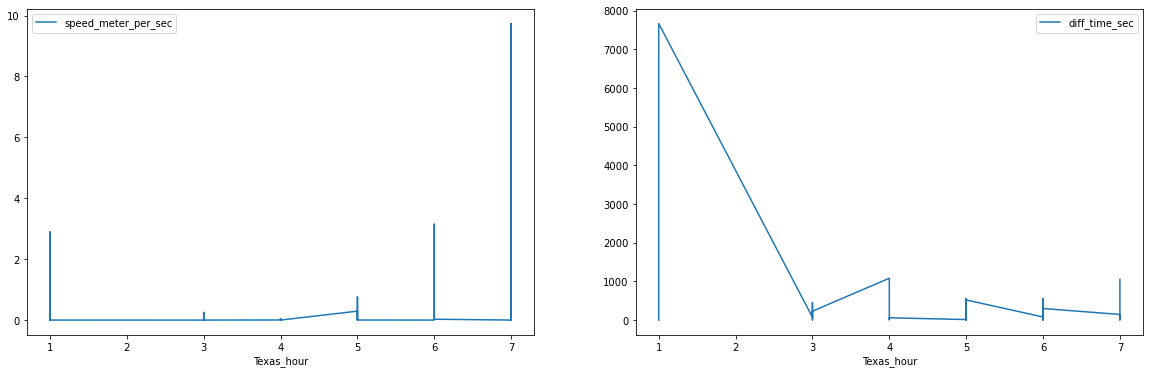

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
home = home.set_index('Texas_hour')
home.plot(y = 'speed_meter_per_sec', ax = ax[0])
home.plot(y = 'diff_time_sec', ax = ax[1])

### Ideas.
Hence, the idea for the **finding_time_come_home**`'s algorithm` will be based on the consequences of the preceding `triple-condition`, follow that
- After `00am` in the given day, finding the **`first-timestamp-index`** $k$ that the speed is tended to $0$ then fluctuated in the interval $(0, 1)$ (this is equal to the velocity of people when walking).
- From`5h30am`, determine the **last-time-index** $q$ that the speed will be increased far-away $(0,1)$; for instance there existed the time-stamp that the speed is attained at-least $3$ m/s.

- If the `timestamp-difference` in `hours` at $p$ and $q$, is greater than $4$ (hours) then we can temporay conclude that this pair of `(longitude, latitude)` is their `home-address` (Since, in fact; there might be the address of `their-friend-house`,`their-parents`,etc). Therefore, we can enhanced the **hypothesis-condition $(H_0):$** **if a list contained the `timestamps` has at-most 3 elements (obviously at-least 2) satified the preceding-conditions then the second index contains the corresponding home-address!!** [Look at the explainations in the following (Remarks).]()

#### Remarks
- In case that the customer come-home before `00am` (for instance `23pm` of the previous-day) and stay there until the next-morning; then the speed will be imediately stable at $0$ at `00 am`.
- If the created-list contain exactly $3$ timestamps then this show that this person may be come home then go to another place at mid-night then comeback-home in the early-morning.
- Otherwise, if the created-list has more than 4 `timestamps` then this show that this person is moving several-places during `0am-6am` and `no-place` can be certained that is their home.
- After ending the iteration; there will be obtained several values of the pair `(latitude, longitude)`; so we can use the `address-value` that appear the most during the day-list then assigned to the `certained-address`.
- Of courses; there will be existed some `ad-id` that has no-information of the address.

#### Example. Finding home of the first ad_id at day=`24,Aug`

In [18]:
find_time_come_home()

1h17m58s
6h39m58s


For this `ad_id` at `24, Aug` then we found exactly $2$ `timestamps`;
- At `1am:17m:58s`, he (or she) come-home.
- At `6am:39m:58s`, go-away home.

Next, look at what happen when `day=25.`

In [19]:
find_time_come_home(day = 25)

5h31m36s
5h34m11s
5h51m41s
5h51m45s
5h56m2s
5h56m4s
5h56m51s
6h6m9s
6h7m9s
6h7m57s
6h16m0s
6h16m58s
6h29m3s
7h26m51s
7h27m5s
7h27m54s
7h51m26s


#### Wrapping up together

In [20]:
comeback_home_coordinate(sub_df)

(-96.767926, 32.811819)

### Complete model

In [21]:
home_address_per_day(df, ad_id)

,ad_id,count_change_dir,count_mvm,count_entered,avg_distance_2_rest,avg_distance_p_day,prob,lati_home,logi_home
24,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,1,1,0.206686,0.287575,1.0,32.811819,-96.767926
25,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,2,1,0.204237,0.285579,0.5,NaN,NaN
26,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,5,5,0.202739,0.284926,1.0,NaN,NaN
27,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,0,0,NaN,NaN,0.0,NaN,NaN
28,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,0,0,NaN,NaN,0.0,NaN,NaN
29,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,0,0,NaN,NaN,0.0,NaN,NaN
30,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,0,0,NaN,0.279311,0.0,NaN,NaN


### Final result.

In [22]:
uni_ad_id = unique_ad_id[:10]
frame = home_address_per_day(df, uni_ad_id[0])
for k in range(1, len(uni_ad_id)):
    frame = frame.append(home_address_per_day(df, uni_ad_id[k], new_df))
frame.head(30)

,ad_id,count_change_dir,count_mvm,count_entered,avg_distance_2_rest,avg_distance_p_day,prob,lati_home,logi_home
24,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,1,1,0.206686,0.287575,1.0,32.811819,-96.767926
25,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,2,1,0.204237,0.285579,0.5,NaN,NaN
26,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,5,5,0.202739,0.284926,1.0,NaN,NaN
27,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,0,0,NaN,NaN,0.0,NaN,NaN
28,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,0,0,NaN,NaN,0.0,NaN,NaN
29,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,0,0,NaN,NaN,0.0,NaN,NaN
30,539f95a6-ce6e-4359-bab5-9f5c866936a2,0,0,0,NaN,0.279311,0.0,NaN,NaN
24,73b10bef-5bae-415c-95c0-c65f9cc22291,0,1,1,0.206686,0.287575,1.0,NaN,NaN
25,73b10bef-5bae-415c-95c0-c65f9cc22291,0,2,1,0.204237,0.285579,0.5,NaN,NaN
26,73b10bef-5bae-415c-95c0-c65f9cc22291,0,5,5,0.202739,0.284926,1.0,NaN,NaN


#### What is the problem if we detect via the phone-number.
- **Problem 1.** If the `phone-number` contained in the dataset that contained the same `utc_timestamp, latitude, longitude` then we can ensure that this `ad_id` is concided the `phone-number`.
- **Problem 2.** If we map 2 datasets by joining only on the `utc_timestamp`, we can not conclude any-thing because we didn't know the position of the customer.
- **Problem 3.** If we map 2 datasets by joining only on the pair of `(longitude, latitude)`, then we can not sure the `timestamp` is concided.